In [30]:
# package for listing and algebra
import numpy as np

# package for data processing
import pandas as pd

# package for plots
import matplotlib.pyplot as plt
%matplotlib inline

# package for regression analysis
import statsmodels.api as sm
from math import sqrt
import os

# package for statistics

from scipy import stats
from scipy.stats import skew
from scipy.special import boxcox1p

# package for more plotting
import seaborn as sns

# import a specific color palette and style guide
color = sns.color_palette()
sns.set_style('darkgrid')

from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import make_regression

from IPython.display import display, FileLink

# Cool command to get rid of useless warning messages
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

In [243]:
data = pd.read_csv("/Users/tclawson/Desktop/ML Project/BlackFriday.csv")
train = pd.read_csv("/Users/tclawson/Desktop/ML Project/train.csv")
test = pd.read_csv("/Users/tclawson/Desktop/ML Project/test1.csv")

In [35]:
data.head(50)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [3]:
data_combined = data.groupby(by = ["User_ID", "Gender", "Age", "Occupation", "City_Category", 
                                   "Stay_In_Current_City_Years", "Marital_Status"], as_index=False) ["Purchase"].sum()

In [4]:
data_combined

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase
0,1000001,F,0-17,10,A,2,0,333481
1,1000002,M,55+,16,C,4+,0,810353
2,1000003,M,26-35,15,A,3,0,341635
3,1000004,M,46-50,7,B,2,1,205987
4,1000005,M,26-35,20,A,1,1,821001
5,1000006,F,51-55,9,A,1,0,379450
6,1000007,M,36-45,1,B,1,1,234427
7,1000008,M,26-35,12,C,4+,1,796545
8,1000009,M,26-35,17,C,0,0,593960
9,1000010,F,36-45,1,B,4+,1,2169486


In [5]:
newdata = pd.DataFrame(data_combined)

In [6]:
newdata

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase
0,1000001,F,0-17,10,A,2,0,333481
1,1000002,M,55+,16,C,4+,0,810353
2,1000003,M,26-35,15,A,3,0,341635
3,1000004,M,46-50,7,B,2,1,205987
4,1000005,M,26-35,20,A,1,1,821001
5,1000006,F,51-55,9,A,1,0,379450
6,1000007,M,36-45,1,B,1,1,234427
7,1000008,M,26-35,12,C,4+,1,796545
8,1000009,M,26-35,17,C,0,0,593960
9,1000010,F,36-45,1,B,4+,1,2169486


In [7]:
newdata.dtypes

User_ID                        int64
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Purchase                       int64
dtype: object

In [8]:
#lets replace the 4+ in Stay_In_Current_City_Years and set it to 4 so we can use it in our analysis

In [9]:
newdata = newdata.replace(['4+'], 
            [4]) 

In [10]:
newdata

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase
0,1000001,F,0-17,10,A,2,0,333481
1,1000002,M,55+,16,C,4,0,810353
2,1000003,M,26-35,15,A,3,0,341635
3,1000004,M,46-50,7,B,2,1,205987
4,1000005,M,26-35,20,A,1,1,821001
5,1000006,F,51-55,9,A,1,0,379450
6,1000007,M,36-45,1,B,1,1,234427
7,1000008,M,26-35,12,C,4,1,796545
8,1000009,M,26-35,17,C,0,0,593960
9,1000010,F,36-45,1,B,4,1,2169486


In [11]:
newdata = pd.get_dummies(newdata, columns=['City_Category'])

In [12]:
newdata

,User_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Purchase,City_Category_A,City_Category_B,City_Category_C
0,1000001,F,0-17,10,2,0,333481,1,0,0
1,1000002,M,55+,16,4,0,810353,0,0,1
2,1000003,M,26-35,15,3,0,341635,1,0,0
3,1000004,M,46-50,7,2,1,205987,0,1,0
4,1000005,M,26-35,20,1,1,821001,1,0,0
5,1000006,F,51-55,9,1,0,379450,1,0,0
6,1000007,M,36-45,1,1,1,234427,0,1,0
7,1000008,M,26-35,12,4,1,796545,0,0,1
8,1000009,M,26-35,17,0,0,593960,0,0,1
9,1000010,F,36-45,1,4,1,2169486,0,1,0


In [13]:
newdata = pd.get_dummies(newdata, columns=['Age'])

In [14]:
newdata = pd.get_dummies(newdata, columns=['Gender'])

In [15]:
newdata

,User_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Purchase,City_Category_A,City_Category_B,City_Category_C,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Gender_F,Gender_M
0,1000001,10,2,0,333481,1,0,0,1,0,0,0,0,0,0,1,0
1,1000002,16,4,0,810353,0,0,1,0,0,0,0,0,0,1,0,1
2,1000003,15,3,0,341635,1,0,0,0,0,1,0,0,0,0,0,1
3,1000004,7,2,1,205987,0,1,0,0,0,0,0,1,0,0,0,1
4,1000005,20,1,1,821001,1,0,0,0,0,1,0,0,0,0,0,1
5,1000006,9,1,0,379450,1,0,0,0,0,0,0,0,1,0,1,0
6,1000007,1,1,1,234427,0,1,0,0,0,0,1,0,0,0,0,1
7,1000008,12,4,1,796545,0,0,1,0,0,1,0,0,0,0,0,1
8,1000009,17,0,0,593960,0,0,1,0,0,1,0,0,0,0,0,1
9,1000010,1,4,1,2169486,0,1,0,0,0,0,1,0,0,0,1,0


In [16]:
#now that our data set is entirely numeric, lets clean it for PCA and TSNE analysis

In [19]:
continuous_data = [
    'Purchase','Stay_In_Current_City_Years'
    
]

In [20]:
# By default the other attributes are categorical
categorical_data = [col for col in newdata.columns if col not in continuous_data]

# check to make sure I did that correctly
categorical_data

['User_ID',
 'Occupation',
 'Marital_Status',
 'City_Category_A',
 'City_Category_B',
 'City_Category_C',
 'Age_0-17',
 'Age_18-25',
 'Age_26-35',
 'Age_36-45',
 'Age_46-50',
 'Age_51-55',
 'Age_55+',
 'Gender_F',
 'Gender_M']

In [21]:
#lets set the x and the y of the data frame

In [22]:
X = newdata
y = newdata.Purchase

In [24]:
datatsne = newdata.drop(['User_ID'], axis=1)

In [25]:
datatsne.head(20)

,Occupation,Stay_In_Current_City_Years,Marital_Status,Purchase,City_Category_A,City_Category_B,City_Category_C,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Gender_F,Gender_M
0,10,2,0,333481,1,0,0,1,0,0,0,0,0,0,1,0
1,16,4,0,810353,0,0,1,0,0,0,0,0,0,1,0,1
2,15,3,0,341635,1,0,0,0,0,1,0,0,0,0,0,1
3,7,2,1,205987,0,1,0,0,0,0,0,1,0,0,0,1
4,20,1,1,821001,1,0,0,0,0,1,0,0,0,0,0,1
5,9,1,0,379450,1,0,0,0,0,0,0,0,1,0,1,0
6,1,1,1,234427,0,1,0,0,0,0,1,0,0,0,0,1
7,12,4,1,796545,0,0,1,0,0,1,0,0,0,0,0,1
8,17,0,0,593960,0,0,1,0,0,1,0,0,0,0,0,1
9,1,4,1,2169486,0,1,0,0,0,0,1,0,0,0,1,0


In [26]:
X = datatsne
y = datatsne.Purchase

In [29]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import numpy as np

#first reduce dimensionality before feeding to t-sne
pca = PCA(n_components=15)
X_pca = pca.fit_transform(X)

rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 10000

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[:10000]) 

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 5891 samples in 0.007s...
[t-SNE] Computed neighbors for 5891 samples in 0.150s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5891
[t-SNE] Computed conditional probabilities for sample 2000 / 5891
[t-SNE] Computed conditional probabilities for sample 3000 / 5891
[t-SNE] Computed conditional probabilities for sample 4000 / 5891
[t-SNE] Computed conditional probabilities for sample 5000 / 5891
[t-SNE] Computed conditional probabilities for sample 5891 / 5891
[t-SNE] Mean sigma: 19.492445
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.596851
[t-SNE] Error after 1000 iterations: 0.286883


In [31]:
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

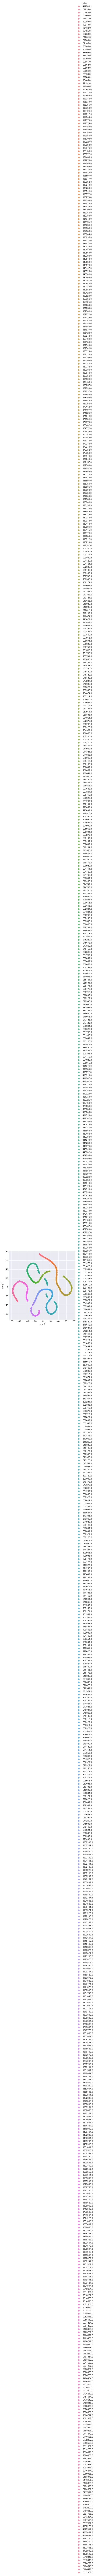

In [32]:
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

clearly we have far too many values as results, lets bucket the purchase column

In [33]:

pd.cut(newdata['Purchase'], 8).head()

0    (33615.325, 1355692.375]
1    (33615.325, 1355692.375]
2    (33615.325, 1355692.375]
3    (33615.325, 1355692.375]
4    (33615.325, 1355692.375]
Name: Purchase, dtype: category
Categories (8, interval[float64]): [(33615.325, 1355692.375] < (1355692.375, 2667276.75] < (2667276.75, 3978861.125] < (3978861.125, 5290445.5] < (5290445.5, 6602029.875] < (6602029.875, 7913614.25] < (7913614.25, 9225198.625] < (9225198.625, 10536783.0]]

In [40]:
#newdata['bin'] = pd.cut(data['Purchase'], 8)
newdata['bin'] = pd.cut(newdata['Purchase'], [0,50000,100000,200000,300000,400000,500000,600000,700000000000])

In [41]:
newdata

,User_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Purchase,City_Category_A,City_Category_B,City_Category_C,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Gender_F,Gender_M,bin
0,1000001,10,2,0,333481,1,0,0,1,0,0,0,0,0,0,1,0,"(300000, 400000]"
1,1000002,16,4,0,810353,0,0,1,0,0,0,0,0,0,1,0,1,"(600000, 700000000000]"
2,1000003,15,3,0,341635,1,0,0,0,0,1,0,0,0,0,0,1,"(300000, 400000]"
3,1000004,7,2,1,205987,0,1,0,0,0,0,0,1,0,0,0,1,"(200000, 300000]"
4,1000005,20,1,1,821001,1,0,0,0,0,1,0,0,0,0,0,1,"(600000, 700000000000]"
5,1000006,9,1,0,379450,1,0,0,0,0,0,0,0,1,0,1,0,"(300000, 400000]"
6,1000007,1,1,1,234427,0,1,0,0,0,0,1,0,0,0,0,1,"(200000, 300000]"
7,1000008,12,4,1,796545,0,0,1,0,0,1,0,0,0,0,0,1,"(600000, 700000000000]"
8,1000009,17,0,0,593960,0,0,1,0,0,1,0,0,0,0,0,1,"(500000, 600000]"
9,1000010,1,4,1,2169486,0,1,0,0,0,0,1,0,0,0,1,0,"(600000, 700000000000]"


In [43]:
bincount=newdata["bin"].value_counts()

In [44]:
bincount

(600000, 700000000000]    2636
(100000, 200000]           983
(200000, 300000]           752
(300000, 400000]           546
(400000, 500000]           425
(500000, 600000]           370
(50000, 100000]            171
(0, 50000]                   8
Name: bin, dtype: int64

In [42]:
def histvis(file):
    file.plot(kind="bar")
    plt.show()

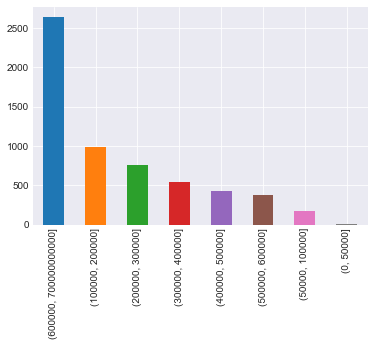

In [45]:
histvis(bincount)

In [46]:
newdata['bin'] = pd.cut(newdata['Purchase'], [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000,1100000,1200000,6000000000])

In [47]:
bincount=newdata["bin"].value_counts()
bincount

(1200000, 6000000000]    1330
(100000, 200000]          983
(200000, 300000]          752
(300000, 400000]          546
(400000, 500000]          425
(500000, 600000]          370
(600000, 700000]          309
(700000, 800000]          259
(800000, 900000]          247
(900000, 1000000]         200
(0, 100000]               179
(1000000, 1100000]        150
(1100000, 1200000]        141
Name: bin, dtype: int64

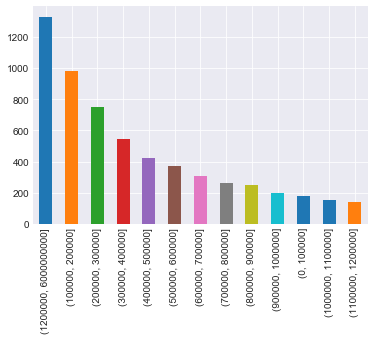

In [48]:
histvis(bincount)

In [49]:
newdata['bin'] = pd.cut(newdata['Purchase'], [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000,1100000,1200000,1300000,1400000,1500000,1600000,1700000,6000000000])

In [50]:
bincount=newdata["bin"].value_counts()
bincount

(100000, 200000]         983
(1700000, 6000000000]    807
(200000, 300000]         752
(300000, 400000]         546
(400000, 500000]         425
(500000, 600000]         370
(600000, 700000]         309
(700000, 800000]         259
(800000, 900000]         247
(900000, 1000000]        200
(0, 100000]              179
(1000000, 1100000]       150
(1100000, 1200000]       141
(1200000, 1300000]       132
(1300000, 1400000]       106
(1400000, 1500000]       100
(1500000, 1600000]        95
(1600000, 1700000]        90
Name: bin, dtype: int64

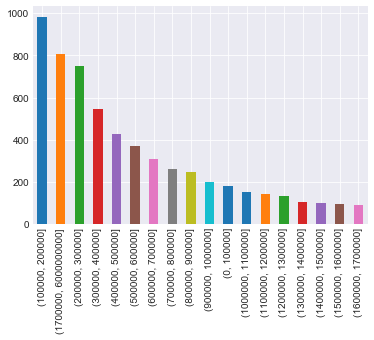

In [51]:
histvis(bincount)

In [52]:
newdata['bin'] = pd.cut(newdata['Purchase'], [0,100000,150000,200000,250000,300000,400000,500000,600000,700000,800000,900000,1000000,1100000,1200000,1300000,1400000,1500000,1600000,1700000,6000000000])

In [53]:
bincount=newdata["bin"].value_counts()
bincount

(1700000, 6000000000]    807
(300000, 400000]         546
(150000, 200000]         511
(100000, 150000]         472
(400000, 500000]         425
(200000, 250000]         423
(500000, 600000]         370
(250000, 300000]         329
(600000, 700000]         309
(700000, 800000]         259
(800000, 900000]         247
(900000, 1000000]        200
(0, 100000]              179
(1000000, 1100000]       150
(1100000, 1200000]       141
(1200000, 1300000]       132
(1300000, 1400000]       106
(1400000, 1500000]       100
(1500000, 1600000]        95
(1600000, 1700000]        90
Name: bin, dtype: int64

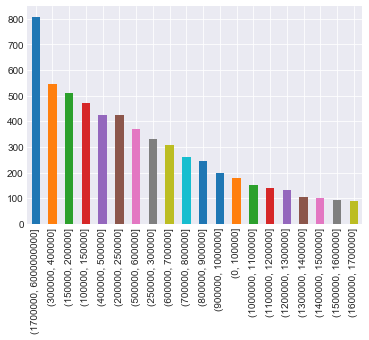

In [54]:
histvis(bincount)

In [80]:
newdata['bin'] = pd.cut(newdata['Purchase'], [0,100000,125000,150000,175000,200000,225000,250000,300000,350000,400000,450000,500000,550000,600000,700000,800000,900000,1000000,1200000,1400000,1700000,2200000,3000000,11000000])

In [81]:
bincount=newdata["bin"].value_counts()
bincount

(250000, 300000]       329
(600000, 700000]       309
(1700000, 2200000]     309
(1000000, 1200000]     291
(300000, 350000]       289
(1400000, 1700000]     285
(125000, 150000]       282
(150000, 175000]       267
(2200000, 3000000]     260
(700000, 800000]       259
(350000, 400000]       257
(800000, 900000]       247
(175000, 200000]       244
(1200000, 1400000]     238
(3000000, 11000000]    238
(400000, 450000]       228
(200000, 225000]       226
(900000, 1000000]      200
(450000, 500000]       197
(225000, 250000]       197
(500000, 550000]       197
(100000, 125000]       190
(0, 100000]            179
(550000, 600000]       173
Name: bin, dtype: int64

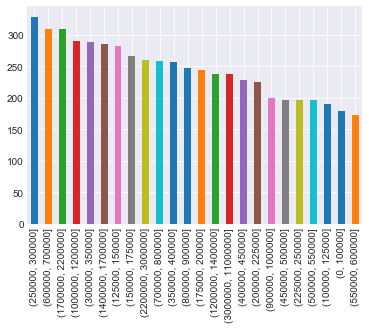

In [82]:
histvis(bincount)

Thats a very even distribution, but what could we do to group spenders in an efective way? I think 5 groups would be valuable. Small spender, average spender, high spender and superspender

In [110]:
newdata['bin'] = pd.cut(newdata['Purchase'], [0,225000,500000,1100000,11000000])



In [111]:
bincount=newdata["bin"].value_counts()
bincount

(500000, 1100000]      1535
(225000, 500000]       1497
(1100000, 11000000]    1471
(0, 225000]            1388
Name: bin, dtype: int64

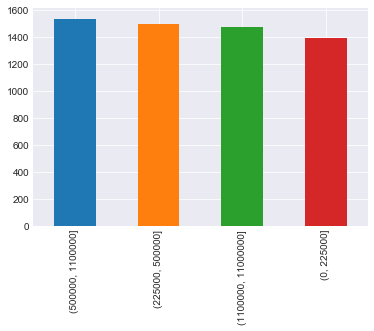

In [112]:
histvis(bincount)

In [113]:
newdata

,User_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Purchase,City_Category_A,City_Category_B,City_Category_C,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Gender_F,Gender_M,bin
0,1000001,10,2,0,333481,1,0,0,1,0,0,0,0,0,0,1,0,"(225000, 500000]"
1,1000002,16,4,0,810353,0,0,1,0,0,0,0,0,0,1,0,1,"(500000, 1100000]"
2,1000003,15,3,0,341635,1,0,0,0,0,1,0,0,0,0,0,1,"(225000, 500000]"
3,1000004,7,2,1,205987,0,1,0,0,0,0,0,1,0,0,0,1,"(0, 225000]"
4,1000005,20,1,1,821001,1,0,0,0,0,1,0,0,0,0,0,1,"(500000, 1100000]"
5,1000006,9,1,0,379450,1,0,0,0,0,0,0,0,1,0,1,0,"(225000, 500000]"
6,1000007,1,1,1,234427,0,1,0,0,0,0,1,0,0,0,0,1,"(225000, 500000]"
7,1000008,12,4,1,796545,0,0,1,0,0,1,0,0,0,0,0,1,"(500000, 1100000]"
8,1000009,17,0,0,593960,0,0,1,0,0,1,0,0,0,0,0,1,"(500000, 1100000]"
9,1000010,1,4,1,2169486,0,1,0,0,0,0,1,0,0,0,1,0,"(1100000, 11000000]"


In [116]:
newdata['bin'] = pd.cut(newdata['Purchase'], [0,225000,500000,1100000,11000000], labels=['1', '2', '3', '4'])

#df['bin'] = pd.cut(df['1'], [0, 50, 100,200], labels=['0-50', '50-100', '100-200'])


In [117]:
newdata

,User_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Purchase,City_Category_A,City_Category_B,City_Category_C,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Gender_F,Gender_M,bin
0,1000001,10,2,0,333481,1,0,0,1,0,0,0,0,0,0,1,0,2
1,1000002,16,4,0,810353,0,0,1,0,0,0,0,0,0,1,0,1,3
2,1000003,15,3,0,341635,1,0,0,0,0,1,0,0,0,0,0,1,2
3,1000004,7,2,1,205987,0,1,0,0,0,0,0,1,0,0,0,1,1
4,1000005,20,1,1,821001,1,0,0,0,0,1,0,0,0,0,0,1,3
5,1000006,9,1,0,379450,1,0,0,0,0,0,0,0,1,0,1,0,2
6,1000007,1,1,1,234427,0,1,0,0,0,0,1,0,0,0,0,1,2
7,1000008,12,4,1,796545,0,0,1,0,0,1,0,0,0,0,0,1,3
8,1000009,17,0,0,593960,0,0,1,0,0,1,0,0,0,0,0,1,3
9,1000010,1,4,1,2169486,0,1,0,0,0,0,1,0,0,0,1,0,4


In [118]:
datatsne = newdata.drop(['User_ID'], axis=1)

In [121]:
X = datatsne
y = datatsne.bin

In [122]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import numpy as np

#first reduce dimensionality before feeding to t-sne
pca = PCA(n_components=15)
X_pca = pca.fit_transform(X)

rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 10000

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[:10000])

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 5891 samples in 0.006s...
[t-SNE] Computed neighbors for 5891 samples in 0.165s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5891
[t-SNE] Computed conditional probabilities for sample 2000 / 5891
[t-SNE] Computed conditional probabilities for sample 3000 / 5891
[t-SNE] Computed conditional probabilities for sample 4000 / 5891
[t-SNE] Computed conditional probabilities for sample 5000 / 5891
[t-SNE] Computed conditional probabilities for sample 5891 / 5891
[t-SNE] Mean sigma: 19.492445
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.833706
[t-SNE] Error after 1000 iterations: 0.320209


In [123]:
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

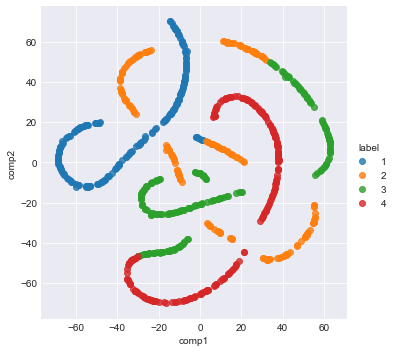

In [124]:
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

In [125]:
#pretty insightful, it will be much easier to classify the low spenders and the super spenders, 
#but the average and high spenders will be difficult

(-100, 100)

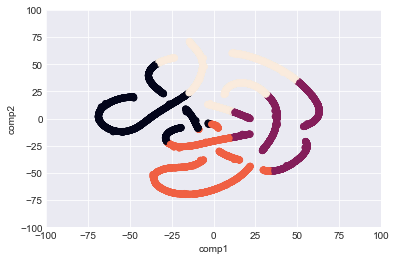

In [133]:
#so how does kmeans perform on the same data?
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, n_init=50, n_jobs=-1)
kmeans.fit(df_tsne[['comp1', 'comp2']])
sk_clusters = kmeans.predict(df_tsne[['comp1', 'comp2']])

plt.scatter(df_tsne['comp1'], df_tsne['comp2'], c=sk_clusters)
plt.xlabel("comp1")
plt.ylabel("comp2")
plt.xlim(-100,100)
plt.ylim(-100,100)
#plt.plot(range(100), range(100))

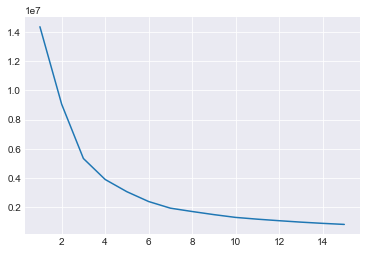

In [134]:
sses = []
for k in range(1,16):
    kmeans = KMeans(n_clusters=k, n_init=50, n_jobs=-1)
    kmeans.fit(df_tsne[['comp1', 'comp2']])
    sses.append(kmeans.inertia_)
plt.plot(range(1,16), sses)

In [135]:
#with k means 6 looks like the best bet

(-100, 100)

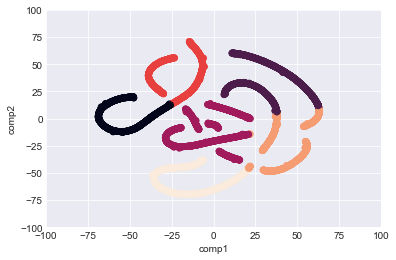

In [136]:
#lets try it

kmeans = KMeans(n_clusters=6, n_init=50, n_jobs=-1)
kmeans.fit(df_tsne[['comp1', 'comp2']])
sk_clusters = kmeans.predict(df_tsne[['comp1', 'comp2']])

plt.scatter(df_tsne['comp1'], df_tsne['comp2'], c=sk_clusters)
plt.xlabel("comp1")
plt.ylabel("comp2")
plt.xlim(-100,100)
plt.ylim(-100,100)
#plt.plot(range(100), range(100))

K means doesnt work on this data frame, and given the categorical nature of our data, kmeans is not likely to be very helpful

Text(0,0.5,'$')

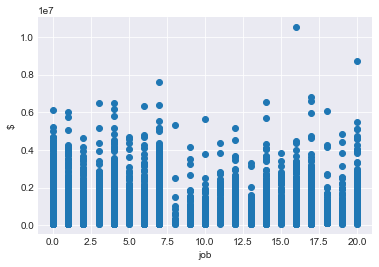

In [138]:
plt.scatter(newdata['Occupation'], newdata['Purchase'])
plt.xlabel("job")
plt.ylabel("$")

In [143]:
occ = newdata.groupby('Occupation', as_index=False)['Purchase'].mean()



In [144]:
occ

,Occupation,Purchase
0,0,9.096146e+05
1,1,8.018430e+05
2,2,9.112320e+05
3,3,9.436968e+05
4,4,8.885546e+05
5,5,1.013742e+06
6,6,8.116917e+05
7,7,8.210504e+05
8,8,8.585058e+05
9,9,6.093103e+05


Text(0,0.5,'avg $')

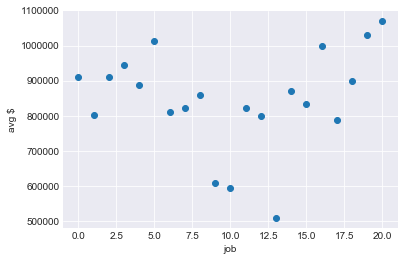

In [146]:
plt.scatter(occ['Occupation'], occ['Purchase'])
plt.xlabel("job")
plt.ylabel("avg $")

In [188]:
#classify middle bracket
newdata['Occupation'].replace([0,1,2,3,4,6,7,8,11,12,13,14,15,17,18],['2','2','2','2','2','2','2','2','2','2','2','2','2','2','2'],inplace=True)
newdata['Occupation'].replace([9,10],['1','1'],inplace=True)
newdata['Occupation'].replace([5,16,19,20],['3','3','3','3'],inplace=True)

In [189]:
#we can break down occupation into three pieces, low middle, and upper
#low = 9,10
#middle = 1,2,3,4,6,7,8,9,10,11,12,13,14,15,17,18
#high = 5,16,19,20

In [190]:
newdata

,User_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Purchase,City_Category_A,City_Category_B,City_Category_C,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Gender_F,Gender_M,bin,Occ_cat
0,1000001,2,2,0,333481,1,0,0,1,0,0,0,0,0,0,1,0,2,1
1,1000002,3,4,0,810353,0,0,1,0,0,0,0,0,0,1,0,1,3,1
2,1000003,2,3,0,341635,1,0,0,0,0,1,0,0,0,0,0,1,2,1
3,1000004,2,2,1,205987,0,1,0,0,0,0,0,1,0,0,0,1,1,
4,1000005,3,1,1,821001,1,0,0,0,0,1,0,0,0,0,0,1,3,1
5,1000006,1,1,0,379450,1,0,0,0,0,0,0,0,1,0,1,0,2,
6,1000007,2,1,1,234427,0,1,0,0,0,0,1,0,0,0,0,1,2,
7,1000008,2,4,1,796545,0,0,1,0,0,1,0,0,0,0,0,1,3,1
8,1000009,2,0,0,593960,0,0,1,0,0,1,0,0,0,0,0,1,3,1
9,1000010,2,4,1,2169486,0,1,0,0,0,0,1,0,0,0,1,0,4,


In [196]:
datatsne = newdata.drop(['User_ID','Occ_cat'], axis=1)

In [205]:
X = datatsne
y = datatsne.bin

In [199]:

pca = PCA(n_components=17)
X_pca = pca.fit_transform(X)

rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 10000

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[:10000]) 

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 5891 samples in 0.007s...
[t-SNE] Computed neighbors for 5891 samples in 0.172s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5891
[t-SNE] Computed conditional probabilities for sample 2000 / 5891
[t-SNE] Computed conditional probabilities for sample 3000 / 5891
[t-SNE] Computed conditional probabilities for sample 4000 / 5891
[t-SNE] Computed conditional probabilities for sample 5000 / 5891
[t-SNE] Computed conditional probabilities for sample 5891 / 5891
[t-SNE] Mean sigma: 38.408351
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.158817
[t-SNE] Error after 1000 iterations: 0.292669


In [200]:
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

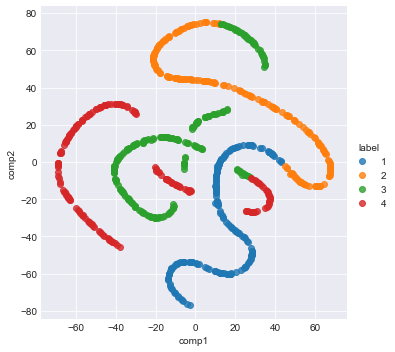

In [201]:
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

In [206]:


pca = PCA(n_components=2)
X_2dim = pca.fit_transform(X)

In [207]:
X_2dim.shape

(5891, 2)

In [208]:
pca.explained_variance_ratio_

array([1.00000000e+00, 1.88654258e-12])

In [210]:
cum_ratio = np.cumsum(pca.explained_variance_ratio_)
index_95 = np.argmax(cum_ratio >= 0.95)
print(index_95)
print(cum_ratio[index_95])

0
0.9999999999951018


In [211]:
newdata

,User_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Purchase,City_Category_A,City_Category_B,City_Category_C,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Gender_F,Gender_M,bin,Occ_cat
0,1000001,2,2,0,333481,1,0,0,1,0,0,0,0,0,0,1,0,2,1
1,1000002,3,4,0,810353,0,0,1,0,0,0,0,0,0,1,0,1,3,1
2,1000003,2,3,0,341635,1,0,0,0,0,1,0,0,0,0,0,1,2,1
3,1000004,2,2,1,205987,0,1,0,0,0,0,0,1,0,0,0,1,1,
4,1000005,3,1,1,821001,1,0,0,0,0,1,0,0,0,0,0,1,3,1
5,1000006,1,1,0,379450,1,0,0,0,0,0,0,0,1,0,1,0,2,
6,1000007,2,1,1,234427,0,1,0,0,0,0,1,0,0,0,0,1,2,
7,1000008,2,4,1,796545,0,0,1,0,0,1,0,0,0,0,0,1,3,1
8,1000009,2,0,0,593960,0,0,1,0,0,1,0,0,0,0,0,1,3,1
9,1000010,2,4,1,2169486,0,1,0,0,0,0,1,0,0,0,1,0,4,


In [212]:
newdata = newdata.drop(['Occ_cat'], axis=1)

In [213]:
newdata

,User_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Purchase,City_Category_A,City_Category_B,City_Category_C,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Gender_F,Gender_M,bin
0,1000001,2,2,0,333481,1,0,0,1,0,0,0,0,0,0,1,0,2
1,1000002,3,4,0,810353,0,0,1,0,0,0,0,0,0,1,0,1,3
2,1000003,2,3,0,341635,1,0,0,0,0,1,0,0,0,0,0,1,2
3,1000004,2,2,1,205987,0,1,0,0,0,0,0,1,0,0,0,1,1
4,1000005,3,1,1,821001,1,0,0,0,0,1,0,0,0,0,0,1,3
5,1000006,1,1,0,379450,1,0,0,0,0,0,0,0,1,0,1,0,2
6,1000007,2,1,1,234427,0,1,0,0,0,0,1,0,0,0,0,1,2
7,1000008,2,4,1,796545,0,0,1,0,0,1,0,0,0,0,0,1,3
8,1000009,2,0,0,593960,0,0,1,0,0,1,0,0,0,0,0,1,3
9,1000010,2,4,1,2169486,0,1,0,0,0,0,1,0,0,0,1,0,4


In [ ]:
#preapring data for a train test split, drop User ID

In [220]:
splitdata = newdata.drop(['User_ID'], axis=1)

In [222]:
target = splitdata['bin']

In [223]:
X_train, X_test, y_train, y_test = train_test_split(splitdata, target, test_size=0.33, random_state=42)

In [225]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [226]:
linear_regression_model = SGDRegressor(tol=.0001, eta0=.01)
linear_regression_model.fit(X_train, y_train)
train_predictions = linear_regression_model.predict(X_train)
test_predictions = linear_regression_model.predict(X_test)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

Train MSE: 7.74460663199114e+41
Test MSE: 9.208104510308176e+41


In [227]:
plot_learning_curve(linear_regression_model, "Learning Curve", X_train, y_train, cv=5)

NameError: name 'plot_learning_curve' is not defined

In [228]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {"eta0": [ .001, .003, .01, .03, .1, .3, 1, 3],
             "tol": [0.01, 0.001, 0.0001]}

linear_regression_model = SGDRegressor()

n_iter_search = 8
random_search = RandomizedSearchCV(linear_regression_model, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=3, scoring='neg_mean_squared_error')
random_search.fit(X_train, y_train)

print("Best Parameters: {}".format(random_search.best_params_))
print("Best Negative MSE: {}".format(random_search.best_score_))

Best Parameters: {'tol': 0.01, 'eta0': 0.003}
Best Negative MSE: -3.692100482460275e+39


In [229]:
linear_regression_model = SGDRegressor(tol=.01, eta0=.003)
linear_regression_model.fit(X_train, y_train)
train_predictions = linear_regression_model.predict(X_train)
test_predictions = linear_regression_model.predict(X_test)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

Train MSE: 1.1750220181606296e+38
Test MSE: 1.3970658512731022e+38


In [244]:
from sklearn.linear_model import ElasticNetCV

# l1 ratio of zero is l2 and visa-versa 
# alphas are how much to weight regularization
clf = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], alphas=[.1, 1, 10])
clf.fit(X_train, y_train)
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)
print("Train MSE: {}".format(mean_squared_error(y_train, train_predictions)))
print("Test MSE: {}".format(mean_squared_error(y_test, test_predictions)))

Train MSE: 0.014258719488107453
Test MSE: 0.016159271932536995


In [246]:
test = test.drop(['User_ID'],axis=1)


In [247]:
predicted_bins = clf.predict(test)

In [248]:
predicted_bins

array([0.29017479, 1.1221907 , 1.12219085, 1.12219085, 1.12219085,
       1.1221907 , 1.12219085, 1.1221907 , 1.1221907 , 0.29017463,
       1.12219085, 1.12219085, 1.1221907 , 0.29017463, 1.12219085,
       0.29017463, 0.29017463, 1.1221907 , 1.1221907 , 1.12219085,
       1.1221907 , 1.12219085, 1.1221907 , 1.1221907 , 0.29017463,
       1.1221907 , 1.1221907 , 0.29017479, 1.1221907 , 1.1221907 ,
       0.29017479, 0.29017479, 1.1221907 , 1.1221907 , 0.29017463,
       0.29017463, 1.1221907 , 1.1221907 , 1.1221907 , 1.12219085,
       1.1221907 , 1.12219085, 0.29017463, 1.12219085, 1.1221907 ,
       1.1221907 , 1.1221907 , 1.12219085, 1.12219085, 1.1221907 ,
       1.12219085, 1.1221907 , 1.12219085, 1.12219085, 1.1221907 ,
       0.29017479, 1.1221907 , 1.1221907 , 1.1221907 , 1.12219085,
       0.29017479, 1.1221907 , 1.1221907 , 1.1221907 , 0.29017479,
       1.1221907 , 1.1221907 , 1.12219085, 1.1221907 , 0.29017479,
       1.12219085, 0.29017463, 1.12219085, 1.1221907 , 0.29017

In [ ]:
#overfitting is likely